# Assignment 2

**Assignment 2: Evolutionary Algorithms**

**Goal**: Implement an Evolutionary Algorithm to solve continuous and discrete problems.

* Part1: continuous problem that is concerned with finding minimum of functions, in this case, Sphere and Ackley
  functions.

* Part 2: discrete problem that is concerned with finding the solution for the N-queens problem. Could be defined as minimization or maximization.

For both parts, this assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve given problems.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Setup**

**Install Prerequisites (Part 1 and 2)**

In [1]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy
#%pip install pyppeteer
%pip install pyppeteer


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Imports (Part 1 and 2)**

In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums
import random 
import pyppeteer


# Set seed
np.random.seed(42)

**Jupyter Notebook Magic (Part 1 and 2)**

In [55]:
# Enables inline matplotib graphs
%matplotlib inline

# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
# plt.ion()

## Part 1: Continuous Optimization (5 points total)

In this part of the assignment you will implement an Evolutionary Algorithm to find the minimum of the following functions: [Sphere](https://www.sfu.ca/~ssurjano/spheref.html) and [Ackley](https://www.sfu.ca/~ssurjano/ackley.html) functions.


**Function Definitions \& Plotting**

**Sphere Function**


In [56]:
def Sphere(x):
    """source: https://www.sfu.ca/~ssurjano/spheref.html"""
    dimension = x.shape[0]
    return (1 / dimension) * (sum(x**2))

**Ackley Function**

In [57]:
def Ackley(x):
    """source: https://www.sfu.ca/~ssurjano/ackley.html"""

    # Ackley function parameters
    a = 20
    b = 0.2
    c = 2 * np.pi
    dimension = len(x)

    # Individual terms
    term1 = -a * np.exp(-b * np.sqrt(sum(x**2) / dimension))
    term2 = -np.exp(sum(np.cos(c * xi) for xi in x) / dimension)
    return term1 + term2 + a + np.exp(1)

**Plotting**

In [58]:
# Generate data for plotting
boundary_point, resolution = 5, 500
x = np.linspace(-boundary_point, boundary_point, resolution)
y = np.linspace(-boundary_point, boundary_point, resolution)

# Generate the coordinate points
X, Y = np.meshgrid(x, y)
positions = np.column_stack([X.ravel(), Y.ravel()])

# Get depths for all coordinate positions
z_unimodal = np.array(list(map(Sphere, positions))).reshape([resolution, resolution])
z_multimodal = np.array(list(map(Ackley, positions))).reshape([resolution, resolution])

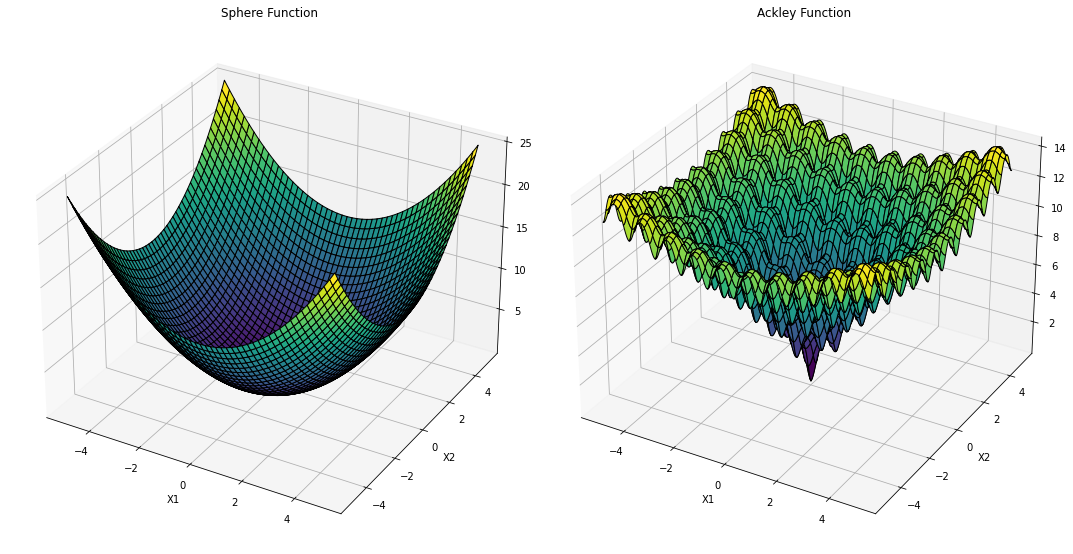

In [59]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))

titles = ["Sphere Function", "Ackley Function"]
for idx, z in enumerate([z_unimodal, z_multimodal]):
    # Create sub-plot
    ax = fig.add_subplot(121 + idx, projection="3d")

    # Plot the surface
    ax.plot_surface(X, Y, z, cmap="viridis", edgecolor="k")

    # Set labels
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(titles[idx])
    # ax.autoscale(True)

# Show the plot
plt.tight_layout()
plt.show()

---
**Question 1.1 (0-0.2 pt):** Looking at the Sphere and Ackley functions, please discuss the characteristics of these functions and compare their complexity in terms of local and global optima.

**Answer:** 
- Sphere function: the surface is smooth, bowl-shaped and more simple. The function is convex- one global optima at (0,0), so no other local optima.
- Ackley function: the surface is irregular, more complex since it is multimodal. The function is non-convex- one global optima at (0,0), but many local optima.

---
**Question 1.2 (0-0.25-0.5 pt):** Please provide a pseudo-code for your evolutionary algorithm. Please try to be as formal as possible!

**Answer:** 

1. Initialize population x randomly in the domain between -50 and 50
2. Evaluate the fitness of each individual in x using the sphare and ackley functions
3. Repeat in range until max generations-1:
   -  Select parents to do crossover
      - repeat in range of number of parents:
         - select two unique and random indexes
         - if the fitness of the first index is less than for second index: select that individual and its fitness
         - else: select the individual and its fitness of second index
   -  Perform crossover to create offspring
      - for each pair of parents:
         - if a random value is less than p_crossover: randomly select a crossover point, perform one point crossover to create offspring 
         - else: set the offspring to the parent values
   -  Perform mutation to update offspring
      - for each individual:
         - if a random value is less than mutation_rate: add a random value (from normal distribution) to each individual 
   -  Evaluate the fitness of the offspring
   -  Select survivors for the next generation
      - combine the population and offspring
      - sort the combined population by their fitness values
      - select the best individuals 
   -  Replace the current population with the selected survivors
   -  Update the best solution
4. Return the best solution found


---
**Task 1.1: Implementation of Evolutionary Algrotihm (0-0.65-1.3-1.95-2.6 pt):** Implement an evolutionary algorithm and its components to find the minimum point of a function. Here, domain should be between [-50,50].

In [60]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.65 pts if the code works but some functions are incorrect and it is badly explained
# 1.3 pts if the code works but some functions are incorrect but it is explained well
# 1.95 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 2.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#Initialize a population randomly based on the population size and dimensions
def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function
    """

    ################################################################

    #use random uniform to generate the population of x
    x = np.random.uniform(low = -50.0, high = 50.0, size = (population_size, num_dimensions))

    ################################################################

    return x #return population


# Implement the evaluation function that can evaluate all the solutions in a given population.
def evaluation(x, objective_function):
    """Evaluate the fitness of the population members"""

    ################################################################
    
    fitness = []
    #evaluate each individual of x by applying the objective function
    for individual in x:
        f_value = objective_function(individual)
        fitness.append(f_value)

    #convert the list to array
    fitness = np.array(fitness)

    ################################################################
    return fitness


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def crossover(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    number_parents, number_dim = x_parents.shape
    number_ofsprings = number_parents - 1

    #greate an array with zeros where to store the offspring values
    offspring = np.zeros((number_ofsprings+1, number_dim))

    #iterate through every 2 valus
    for i in range(0, number_ofsprings, 2):
        parent = x_parents[i]
        parent2 = x_parents[i+1]

        #if a random value between 0 and 1 is smaller than the crossover, perform it
        if np.random.rand() < p_crossover:
            #select a random integer as a crossover point
            cross_over = np.random.randint(1, number_dim)
            #do one point crossover
            offspring[i] = np.concatenate((parent[:cross_over], parent2[cross_over:]))
            offspring[i+1] = np.concatenate((parent2[:cross_over], parent[cross_over:]))
        #do not do the crossover, so just select parents as offspring
        else:
            offspring[i] = parent
            offspring[i+1] = parent2




    ################################################################

    return offspring


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def mutation(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    for i in range(len(x)):
        #perform mutation if a random value between 0 and 1 is less than the mutation rate
        if np.random.rand() < mutation_rate:
            #the mutation value is a random value from the normal distribution
            mutation_value = np.random.normal(0,1)
            #add the mutation value to each individual in the population
            x[i] += mutation_value

    ################################################################

    return x


def parent_selection(x, f):
    """Select parents for the next generation"""

    ################################################################

    population_size = len(x)
    number_parents = population_size

    #create 2 arrays of zeros to store the parents and parent fitness values
    x_parents = np.zeros((number_parents, x.shape[1]))
    f_parents = np.zeros(number_parents)

    for i in range(number_parents):
        #select 2 random indexes 
        idx1, idx2 = np.random.choice(population_size, size=2, replace=False)
        #compare the fitness values of indexes, if they are smaller, select those of that index
        if f[idx1] < f[idx2]:
            x_parents[i] = x[idx1]
            f_parents[i] = f[idx1]
        #if bigger, select the values of second index
        else:
            x_parents[i] = x[idx2]
            f_parents[i] = f[idx2]
    
    ####################################
    return x_parents, f_parents




def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    ################################################################

    #combine the population and offspring
    combined_population = np.concatenate((x, x_offspring), axis=0)
    combined_fitness = np.concatenate((f, f_offspring), axis=0)
    #sort the indeces by fitness
    sorted = np.argsort(combined_fitness)
    combined_population = combined_population[sorted]
    combined_fitness = combined_fitness[sorted]
    #select the best values
    x = combined_population[:len(x)]
    f = combined_fitness[:len(x)]

    ################################################################

    return x, f


def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    dimensions,  # number of dimensions
    objective_function,  # objective function to be minimized
):
    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE

    
    
    ################################################################
    # PLEASE FILL IN
    x = initialization(population_size, dimensions)
    f = evaluation(x, objective_function)
   
    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmin(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Perform the EA steps

       
        ################################################################
        
        x_parents, _ = parent_selection(x, f)
        offspring = crossover(x_parents, p_crossover)
        offspring = mutation(offspring, m_rate)
        f_offspring = evaluation(offspring, objective_function)
        x,f = survivor_selection(x, f, offspring, f_offspring)
        
        ################################################################
        

        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

    return x_best, f_best  # return the best solution and fitness in each generation

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see
the algorithm running.

In [61]:
# Dummy parameters
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "dimensions": 20,
    "objective_function": Sphere,
}

# Run the EA

x_best, f_best = ea(**kwargs)

# Print the best individual and its fitness
print("Best solution:", x_best[-1])
print("Best Fitness:", f_best[-1])

# Clear cache
del x_best, f_best, kwargs

Best solution: [-13.08328129   9.99787283   8.48077669   1.18362776 -29.98487994
 -11.77692703  16.24110964   6.06364726  22.21107514 -27.9925169
 -13.26045678  11.13649081  14.68149425  -3.07909195  16.6291761
  -8.72735361  -7.7704256  -16.75975026  15.42795379  15.63107644]
Best Fitness: 233.0451543887607


**Reults and statistical analysis**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs. 

How do we find overal performance of the algorithm and compare the results?

By running multiple times and performing statitical tests. Therefore, you would need to run your algorithm **20 times** and plot the *average* results.

First, we would need to **defining some helper functions** for finding the average and standard deviations of multiple runs and ploting them. In the next few cells, we give you some pre-made functions for this purpose. 

There is no work for you to do, but do look over them and get familiar with how they operate.

In [62]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [63]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 10  # DO NOT CHANGE - number of runs
    max_fit_evals = 5000  # DO NOT CHANGE

    sphere10D = []
    sphere50D = []
    ackley10D = []
    ackley15D = []

    for _ in range(runs):
        _, f_best_sphere10D = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            10,
            Sphere,
        )

        _, f_best_sphere50D = ea(
            population_size[1],
            max_fit_evals,
            p_crossover[1],
            m_rate[1],
            50,
            Sphere,
        )
        _, f_best_ackley10D = ea(
            population_size[2],
            max_fit_evals,
            p_crossover[2],
            m_rate[2],
            10,
            Ackley,
        )
        _, f_best_ackley15D = ea(
            population_size[3],
            max_fit_evals,
            p_crossover[3],
            m_rate[3],
            15,
            Ackley,
        )

        sphere10D.append(f_best_sphere10D)
        print(f_best_sphere10D)
        sphere50D.append(f_best_sphere50D)
        ackley10D.append(f_best_ackley10D)
        ackley15D.append(f_best_ackley15D)
        

    # find average and std of the runs
    sphere10D_avg, sphere10D_std = calculate_mean_std(sphere10D)
    sphere50D_avg, sphere50D_std = calculate_mean_std(sphere50D)
    ackley10D_avg, ackley10D_std = calculate_mean_std(ackley10D)
    ackley15D_avg, ackley15D_std = calculate_mean_std(ackley15D)

    avgs = [sphere10D_avg, sphere50D_avg, ackley10D_avg, ackley15D_avg]
    stds = [sphere10D_std, sphere50D_std, ackley10D_std, ackley15D_std]
    all_runs = [
        sphere10D,
        sphere50D,
        ackley10D,
        ackley15D,
    ]

    return avgs, stds, all_runs

In [64]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

#### Running The Experiments

In the following cell we run the EA over several different hyper-parameter values.

In [65]:
population_size = [50, 50, 50, 50]  # DO NOT CHANGE
p_crossover = [0.8, 0.8, 0.8, 0.8]  # DO NOT CHANGE
m_rate = [0.1, 0.1, 0.1, 0.1]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment(
    population_size, p_crossover, m_rate
)

[320.55186546027244, 202.10918736357476, 202.10918736357476, 202.10918736357476, 171.04179355051508, 170.14504855982528, 148.5208128926, 116.9089482078843, 106.04859339050657, 89.39636743738302, 82.41603388388931, 77.14362243202419, 77.14362243202419, 76.38055804010415, 71.40928636107647, 70.31554614720953, 69.51699560047061, 67.80189512280438, 66.00027596711072, 65.15969896432584, 63.63139057390666, 61.47540497243396, 59.1566767889912, 57.198452924664686, 55.65258449925674, 53.096864609860155, 53.085335955256284, 51.07012216490932, 50.665548403006625, 46.17697444698927, 46.17697444698927, 43.717379138913, 43.717379138913, 42.83419537782687, 42.83419537782687, 42.74226499105566, 42.11857246212506, 41.88628330882553, 41.24931928877598, 40.238271925011894, 40.238271925011894, 39.90859415561874, 39.0936567259734, 38.085674383777125, 38.085674383777125, 37.35063805285722, 37.35063805285722, 37.17207055308239, 37.17207055308239, 37.15746063236207, 36.90849228586705, 36.80426287669282, 36.72

[446.6631728181387, 276.90220640191615, 276.90220640191615, 276.90220640191615, 163.75014187789895, 135.52501811471413, 65.67166964791613, 65.67166964791613, 39.05929974152339, 39.05929974152339, 31.959628700841684, 31.959628700841684, 31.77235519726025, 31.17248229235915, 31.012134966172194, 30.668246677391377, 29.150257733059636, 27.8382766035306, 27.827514070626435, 26.931688906763135, 26.019070923421015, 26.010019157310598, 25.162206835444128, 25.01559805595126, 24.211212834186398, 23.857989239094238, 23.77980856100794, 23.127025710250223, 22.41822503442295, 22.17166911339949, 22.113431757514817, 21.84527167964791, 21.84427621310828, 21.69463734558589, 21.681888753694633, 21.681888753694633, 21.681888753694633, 21.58747695700092, 21.58747695700092, 21.32813482671793, 21.32813482671793, 20.852221900901394, 20.84768151355951, 20.592880861441547, 20.592880861441547, 20.442074915623113, 20.05325863299872, 19.686629025866928, 19.686629025866928, 19.274765119460962, 19.274765119460962, 1

#### Plotting The Results

In the following cell we plot the results of the experiments.

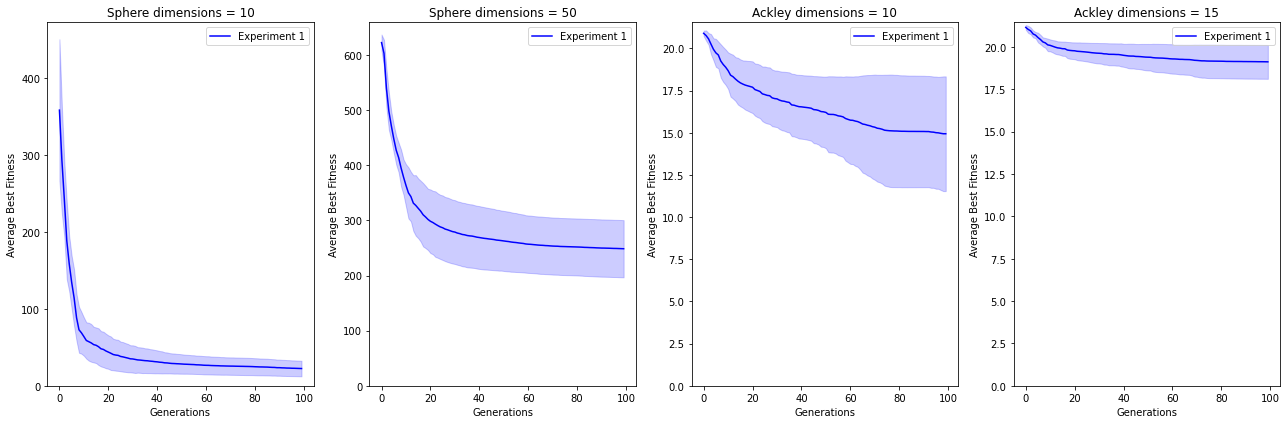

In [66]:
labels = [  # DO NOT CHANGE
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=4,
    n_queens=None,
)

---

**Question 1.3 (0-0.25-0.5 pt):** Describe the results that you see in the line graphs. How is the performance of the EA on Sphere and Ackley functions? How the results are different between functions and dimensions? What causes these differences?

**Answer:** 
- Shpare function
For 10 dimensions the algoirithm quickly decreases meaning that it can find the value close to minimum fast. For 50 dimensions it is already decresing more gradual. Therefore, the algorithm can more efficiently work with lower dimensions.
- Ackley function
For 10 dimensions the algorithm is also more efficient than for 50 dimensions. In both cases the optimal value was not found. However, in the case of 10 dimensions the line does down, so it can potentially find the mininum after more iterations or with different parameters. However, for 50 dimensions the line is decreasing slower, indicating more difficulties in finding the path to the minima.

It can be clearly seen that the EA deals better with Sphare function comparing with Ackley function and that it is better with lower dimensions. This means that the EA is more efficient with smooth, low-dimensional spaces. The differences are caused by the fact that sphrare function has only one global minimum, while ackley function has many local minima that make the algorithm more slow. The higher the dimensions, the bigger the search space, which makes the convergence slower. In addition, the hyperparameters such as population size, crossover probability, mutattion rate and the randomness involved may serve as cause of various results.

---
**Improve Your Results**

Experiment with the hyperparameters of the algorithm and find a set of parameters that can perform better than the previous results. Compare the results using statistical test and find a settings where there is a statistically significant improvement.

You can adjust the *population size*, *crossover probability* and *mutation rate* to find the settings that can work statistically better relative to the previous results. Please look at the "ADJUST THESE VALUES" part to experiment and improve your solutions.

Optionally, you can also improve your algorithm by implementing/changing strategies used 

In [67]:
# Grading (bonus points):
# 0.4 pts bonus for the optional improvement: if you implement different strategy, it works and produces significantly better results
# Different strategy could be a different implementation of the mutation/crossover/parent or survival selection mechanisms

#change mutation 
#comment and run again to see the improvements of the hyperparameters themselves 
#please note that this muatation function by itself (with the old hyperparameters) does work for significant difference in results but not each time (due to randomness).


def mutation(x, mutation_rate):
    #at each position determine if the mutation will happen or no
    mutations = np.random.rand(*x.shape) < mutation_rate
    #generate mutation values from a random distribution
    mutation_values = np.random.normal(0, 1, x.shape) * mutations
    #add the values to x
    x += mutation_values

    return x

##################

In [68]:
################################################################

# population_size = [  # ADJUST THESE VALUES 
#     50,
#     50,
#     50,
#     50,
# ]
# p_crossover = [  # ADJUST THESE VALUES 
#     0.8,
#     0.8,
#     0.8,
#     0.8,
# ]
# m_rate = [  # ADJUST THESE VALUES 
#     0.1,
#     0.1,
#     0.1,
#     0.1,
# ]



population_size = [  # ADJUST THESE VALUES
    100,
    100,
    100,
    100,
]
p_crossover = [  # ADJUST THESE VALUES
    0.9,
    0.9,
    0.9,
    0.9,
]
m_rate = [  # ADJUST THESE VALUES
    0.9,
    0.9,
    0.9,
    0.9,
]


################################################################

**Running the experiment again**

In [69]:
avgs_experiment_2, stds_experiment_2, all_runs_experiment_2 = run_experiment(
    population_size, p_crossover, m_rate
)

[239.8474468302845, 219.1561336915205, 195.9513721214563, 190.069697724479, 169.847846526341, 142.550509182194, 122.08275755376886, 115.17419738128345, 96.8488515269046, 76.4545492379103, 67.89153623093152, 57.86306129316653, 38.11446412482319, 31.44149356244454, 27.854070146861716, 25.42003676213353, 15.972641934578775, 13.55480894209592, 9.162863914750112, 8.812188370175853, 7.127333097464663, 3.715788811712696, 3.715788811712696, 2.9072363659191884, 2.2428113675131844, 0.5209567932811242, 0.5209567932811242, 0.5209567932811242, 0.5209567932811242, 0.5209567932811242, 0.5209567932811242, 0.29605887770376943, 0.29605887770376943, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.2240119087726364, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477, 0.21217358974674477]
[255.17972239

[383.0885309062371, 229.58126092630556, 208.26852503300086, 158.75956789098075, 104.35769259944306, 94.37817570635859, 63.61092767284308, 46.28961465359088, 41.82507201925616, 40.65986407765295, 32.01027596165924, 29.103767005854664, 24.199444891192144, 19.052425103421168, 9.29196631504809, 9.29196631504809, 9.29196631504809, 7.985902360236086, 4.992379996870219, 4.992379996870219, 4.992379996870219, 2.956260343715968, 2.9427026335066246, 2.4076454239246736, 1.9355264120894178, 1.832363069247036, 0.948819798760395, 0.5477560778246754, 0.5477560778246754, 0.5477560778246754, 0.5477560778246754, 0.5443571369484411, 0.5443571369484411, 0.5443571369484411, 0.4651327801114682, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.34773848291026743, 0.3308222495822768, 0.3308222495822768, 0.3308222495822768, 0.3308222495822768, 0.3308222495822768, 0.1181868973996799, 0.1181868973996799]
[374.402599

**Plotting the new and previous results**

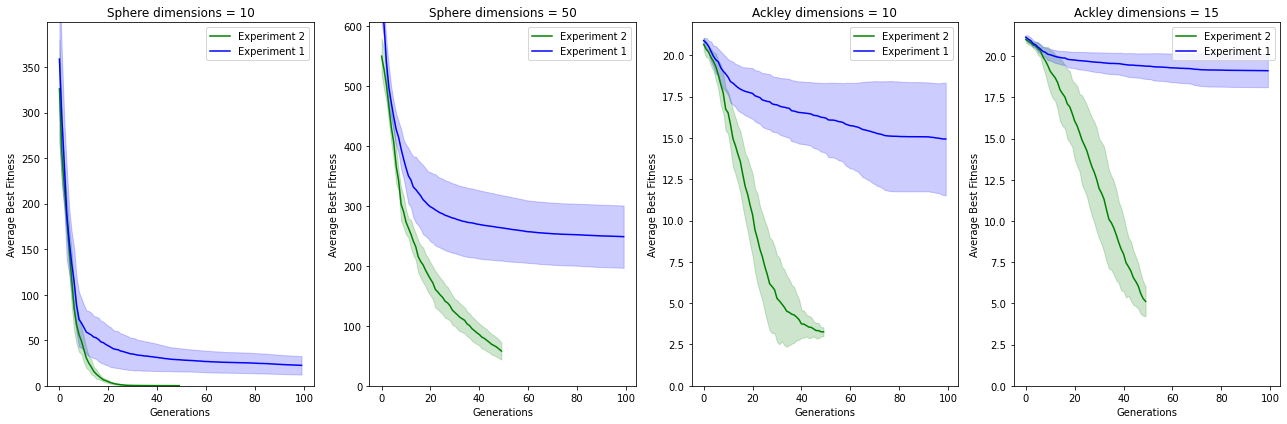

In [70]:
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=avgs_experiment_2,
    stds_experiment_2=stds_experiment_2,
    n_columns=4,
    n_queens=None,
)

**Measuring the statistical significance of differences of two sets of experiment results**

The final step is to calculate whether the results from your set of hyperparameters (experiment 2) resulted in significantly better results.

To do this, we will perform a statistical test know as [rank-sum test](https://www.wikiwand.com/en/Mann%E2%80%93Whitney_U_test).

You will calculate the rank-sum for the results of the first and second experiments.

In [71]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_1 = all_runs_experiment_1[i]
    runs_exp_2 = all_runs_experiment_2[i]

    best_per_run_exp_1 = [sublist[-1] for sublist in runs_exp_1]
    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]

    t_statistic, p_value = ranksums(best_per_run_exp_1, best_per_run_exp_2)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

Sphere function 10 dimensions: Experiment 1 average: 22.474409152508045 , Experiment 2 average: 0.15804210482978498 ,significant difference.
Sphere function 50 dimensions: Experiment 1 average: 248.65241299478288 , Experiment 2 average: 57.97477229789863 ,significant difference.
Ackley function 10 dimensions: Experiment 1 average: 14.938953356312245 , Experiment 2 average: 3.2678895408647195 ,significant difference.
Ackley function 15 dimensions: Experiment 1 average: 19.11749066804345 , Experiment 2 average: 5.122189210830302 ,significant difference.


---
**Question 1.4 (0-0.3-0.6-0.9-1.2 pt):** Please improve the results significantly in each case (i.e. on Sphere and Ackley functions with 10, 50 and 10, 15 dimensions respectively) and discuss what kinds of changes you had to do to achieve this improvement. Please provide your reasoning why the new parameter settings worked better.

Grading:

0 pts: No answer or non of the cases were improved.

0.3 pts: At least one of the cases improved significantly but reasons why were not clearly explained.

0.6 pts: One or two cases improved significantly and the reasons why were somewhat clear.

0.9 pts: Three to four cases improved significanlty and the reasons why are clear.

1.2 pts: All of the cases improved significanlty and the reasons why are clear.


**Answer:** 

The parameters were changed for all functions to make improvement as follows:
- the population size was increased to 100
- the probability of crossover was increased to 0.9
- the probability of mutation was increased to 0.9

The decision to make the same changes for all functions was to better understand the performance and for constant comparison and analysis. 

Increasing the population size from 50 to 100 allows to do more exploration. Meaning, the larger the population, the higher chance of finding a better solutions because a wider range of potential solutions is explored. This is especially meaningful for high-dimensional functions. Furthermore, by increasing the probability of doing crossover chances of recombination and exploring and finding better results increase. Similarly, increasing mutation rate to 0.9 again leads to more extensive exploration of the solution space. Thid adjustment can help with escaping local minima which is very important when dealing with functions such as ackley. Overall, these adjustments allow higher exploration, which helps to find a better solution.

Another improvement was the new, vectorized mutation function. The function was adapted to deal with larger populatuon sizes and high-dimensional spaces. By combining the new mutation function and the new hyperparemeters, it can be clarly seen that there is a significant difference in the results of finding the minimum fitness value




---
## Part 2: Discrete Optimization (The N-Queens Problem, 5 points total) 

Implement an Evolutionary Algorithm for the **n-queens problem**.
Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

We would like to implement an EA that can find a solution for any given N by N board but in this case it is required to place N queens where none of them attack each other.

You may use the implementation of the EA you used for solving continuous problems in Part 1. But remember, this is a discere problem so you would need to think about how to represent the solutions and search using the evolutionary operators.

Consider, what changes you would need to do! 


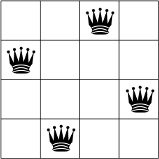


It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

**Question 2.1 (0-0.3 pt):** How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** 
Length of genotype representation would be 3 (if we count from 0), 4 (if we count from 1). [ \_ , \_ , \_ , \_ ]. Each entry represents one column. 
Each gene can get a value from 1 to 4 to represent a row in the corresponding column. It was decided to count from 1 and not from 0 to make it more intuitive for people to understand and work with the representation in chess context.

**Question 2.2 (0-0.2 pt)**: Please write down an example representation and discuss what it means.

**Answer:** Considering the example given in the illustration above- [2,4,1,3]. In the first column, the queen is in the second row. So the first entry of the list gets a value of 2. In the second column the queen is in the forth row. So the second entry of the list gets s value of 4, and so on. Overall, we have 4 entries (columns) and each entry will have a number from 1 to 4 representing the corresponding row in which the queen is placed.


**Question 2.3 (0-0.2 pt):** How many possible solutions can be generated in your representation?

**Answer:** The first entry (column) can have 4 different values, but the second should be unique, so it can have 3 values and so on. Therefore 4! = 4 * 3 * 2 * 1 = 24

---
**Task 2.1 (0-0.20-0.40-0.80):** Implementation of solution encoding, visualization and evaluation functions.

In [72]:
################################################################

example_solution = [2, 4, 1, 3]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells.


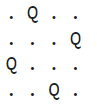

In [73]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################

    #the size of the board is the same as length of the solution
    board_length = len(solution)
    board = []
    #create rows
    for _ in range(board_length):
        row = []
        for _  in range(board_length):
            #add dots to the row entries
            row.append(".")
        board.append(row)

    #add queens
    for col, row in enumerate(solution):
        board[row-1][col] = 'Q'
    for row in board:
        print(' '.join(row))

    ################################################################

Write the evaluation function to assess how good your solution is.

In [74]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################

    n = len(solution)
    #set the attack number to 0 
    attack = 0
    for i in range(n):
        for j in range(i+1, n):
            #add one to attack if the queens are on the same row or diagonal 
            if solution[i] == solution[j] or abs(i-j) == abs(solution[i]-solution[j]):
                #add 1 to the attack count
                attack += 1
                #stop if they are attacking each other
                break

    #the fitness is the max possible value (n) - attack count
    fitness = n - attack
    

    ################################################################

    return fitness

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [75]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2, 4, 1, 3]
Phenotype (solution visualization):
. . Q .
Q . . .
. . . Q
. Q . .
Solution fitness 4


---

**Task 2.2 (0-0.4-0.8-1.2-1.6 pt):** Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [113]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#initialize a population of solutions for the N queens problem where num_dims = N 
def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################

    #use the rng numpy function to generate a population
    rng = np.random.default_rng()
    x = rng.integers(0, num_of_dims, size=(population_size, num_of_dims))
    #convert it to an array
    x = np.array(x)
    

    ################################################################

    return x #return population


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################
    #the crossover was updated (from the first exercise) to 2 point crossover

    #create an empty loist to store offspring values
    offspring = []
    #iterate through pairs of parents
    for i in range(0, len(x_parents), 2):
        #create a copy for each parent to save the original values
        parent1 = x_parents[i].copy()
        parent2 = x_parents[i+1].copy()
        #if a random vlaue between 0 and 1 is less than p_crossover
        if np.random.rand() < p_crossover:
            #select 2 random crossover points
            cross_over1 = random.randint(1, len(parent1) - 2)
            cross_over2 = random.randint(cross_over1 + 1, len(parent1) - 1)
            #do 2 point crossover to create offspring
            offspring1 = np.concatenate((parent1[:cross_over1], parent2[cross_over1:cross_over2], parent1[cross_over2:]))
            offspring2 = np.concatenate((parent2[:cross_over1], parent1[cross_over1:cross_over2], parent2[cross_over2:]))
            #add the new values to the list
            offspring.extend([offspring1, offspring2])
        else:
            #if no crossover, add parents to the offspring list
            offspring.extend([parent1, parent2])

    
    ################################################################

    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################
    
    #iterate through indexs
    for i in range(len(x)):
        #if a random value between 0 and 1 is less than mutation_rate
        if np.random.rand() < mutation_rate:
            #select a random index
            swap_idx = random.randint(0, len(x)-1)
            #swap the original index with the randomly selected index
            x[i], x[swap_idx] = x[swap_idx], x[i]


    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation"""

    ################################################################
    
    #the parent selection was updated (from the first exercise) to tournament

    #create an array of f
    f = np.array(f)
    
    #this will generate random number
    random_n = np.random.default_rng()
    
    #create arrays of zeros for x parents and f parents
    x_parents = np.zeros_like(x)
    f_parents = np.zeros(len(f))
    
    for i in range(len(f)):
        #select 2 random participants 
        participants = random_n.choice(len(f), size=2, replace=False)

        #evaluate the fitness of participants
        participant_fitness = [f[index] for index in participants]
        min_idx = np.argmin(participant_fitness)
        win_idx = participants[min_idx]
        
        #select the best individuals
        x_parents[i] = x[win_idx]
        f_parents[i] = f[win_idx]


    ####################################
    return x_parents.astype(int), f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################

    #combine x and offspring
    combined_population = np.concatenate((x, x_offspring), axis=0)
    combined_fitness = np.concatenate((f, f_offspring), axis=0)
    #sort by fitness
    sorted = np.argsort(combined_fitness)[::-1]
    combined_population = combined_population[sorted]
    combined_fitness = combined_fitness[sorted]

    #select the best of the population and offspring
    x = combined_population[:len(x)]
    f = combined_fitness[:len(x)]

    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    #########################
    #  PLEASE FILL IN
    
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)
    #########################

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        
        #########################

    
        x_parents, _ = parent_selection_n_queens(x, f)
        offspring = crossover_n_queens(x_parents, p_crossover)
        offspring = mutation_n_queens(offspring, m_rate)
        f_offspring = evaluation_n_queens(offspring)
        x, f = survivor_selection_n_queens(x, f, offspring, f_offspring)
        
        
        idx = np.argmax(f)
        x_best.append(x[idx])
        f_best.append(f[idx])
            
        #########################

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        f_best.append(fi_best)
        x_best.append(xi_best)
    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.


In [123]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 8
Best solution found:
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .
. . . Q . . . .
. Q . . . . . .


In [133]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(200, 100000, 0.9, 0.2, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:


Best fitness: 15
Best solution found:
. . . Q . . . . . . . . . . . .
. . . . . . Q . . . . . . . . .
. . . . . . . . . Q . . Q . . .
. . . . . Q . . . . . . . . . .
Q . . . . . . . . . . . . . . .
. . . . . . . . . . . . . Q . .
. . . . . . . Q . . . . . . . .
. . Q . . . . . . . . . . . . .
. . . . . . . . . . . . . . Q .
. . . . . . . . Q . . . . . . .
. . . . . . . . . . Q . . . . .
. . . . . . . . . . . . . . . Q
. . . . Q . . . . . . . . . . .
. . . . . . . . . . . Q . . . .
. Q . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . .


In [125]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1].astype(int))

Case when N=32:


Best fitness: 25
Best solution found:
. . . . . . . . . . Q . . . . . . . . . Q . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . .
. . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . .
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . Q . . . . . Q . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . .
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . .
. . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . .
. 

---

**Question 2.4 (0-0.2-0.4-0.6-1-1.5 pt):** Describe the results. What was the fitness found for each case? Were you able to find fitness scores of 8, 16 and 32 for N=8, 16 and 32 cases? How did you find them? Did you try improving the results by testing different parameters and/or evolutionary operators?

Grading:

0 pts: no solution or visualization provided.

0.2 pts: Solutions and visualizations were provided, no insights provided how the results achieved. 

0.4 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, limited/no insights provided on how this result is achieved. 

0.6 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, insights on how this result is achieved provided.

1 pts: Solutions and visualizations were provided, for N=8 and N=16, optimum solutions were found, insights on how this result is achieved provided. 

1.5 pts: Solutions and visualizations were provided, for N=8, N=16 and N=32, optimum solutions were found, insights on how this result is achieved provided. 

**Answer:** 

For all three cases optimal fitness values were found by implementing an evolutionary algorihtm. Different evolutionary operators were testeed to achieve better results. To be more precise, I 
- For n=8 it is quite easy to find the solution, so the algorithm was able to find a solution with fintess value of 8 (so no queens were attacking each other). This means that the given parameters work well with the implemented algorithm. The balance between exploration or explotation is well done. 
- For n=16 the algorithm found a solution with fitness value of 15, indicating that one pair of queens is attacking each other. This result could be improved by increasing the mutation rate to get more diversity or by increasing the population size to allow more options to pick the best values from.
- For n=32 the best fitness was 25, which is not perfect but reasonable for given parameters and algorithm. To improve the results the crossover probability and population size could be increased. However, this problem is more complex, so also improving the algorithm itself or try another algorithm would be neccassary to achieve significantly better results.

---

#### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm similar to Part 1. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [99]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):
    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.

    max_fit_evals = 10000

    fitness_8 = []
    fitness_16 = []
    fitness_32 = []

    runs = 10

    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)


    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [136]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)




Run:  0


Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


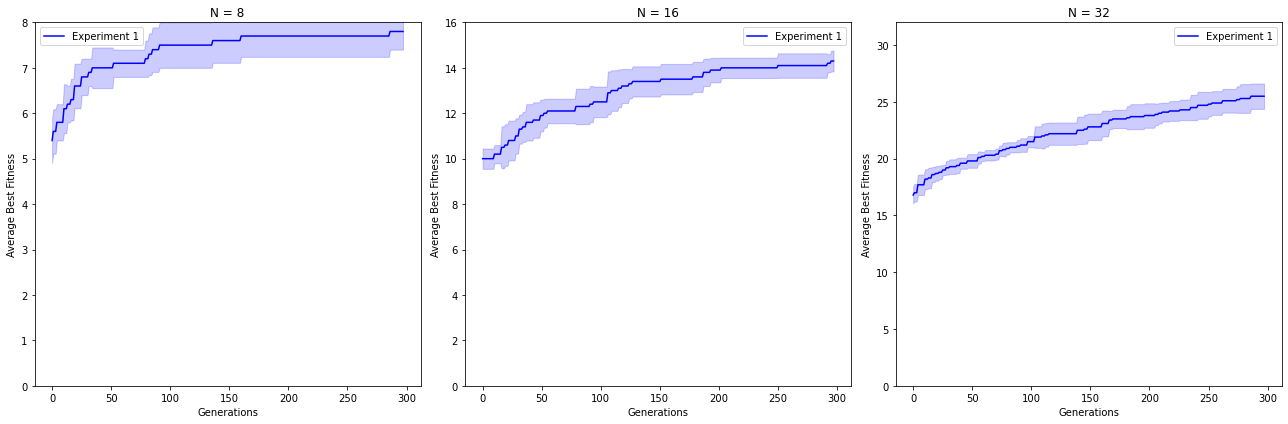

In [105]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)


**Question 2.5 (0-0.2-0.4 pt)** Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: In all three cases the algorithm found a better fitness when the generation number increased. For n=8 the algorithm found the best fitness value quite fast, while for n=16 and n=32 the lines increased more slowly. Therefore, the more dimensions the more generations it takes to find the best solution. For n=8 the algorithm found the best solution- 8. For n=16 a fitness of 15 was found. For n=32 the best fitness was 26. Overall, this ea is efficient with n=8 but less efficient to solve the n-queen problems for higher dimensions. 
